# Data Preparation

### Installing MySQL Connector

In [ ]:
# This is one time installation required to connect with MySQL database to fetch data
!pip install mysql-connector-python


### Import all the required packages

In [ ]:
import mysql.connector
from mysql.connector import Error
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import time

### Load Data from table
----------------------------------------------------------
> - Create MySQL Connection
> - Retrieve data from all the required tables & store in a dataframe
> - Close Connection

In [ ]:
# Function to connect to Database
def connect_db():
    return mysql.connector.connect(
        host='cpanel.insaid.co',
        database='Capstone2',
        user='student',
        password='student',
        connect_timeout=1000000,
        buffered=True
    )

In [ ]:
# Function to fetch data by passing a SQL Query
def get_data(query):
    df = pd.DataFrame()
    try:
        db_connection = connect_db()
        start_time = time.time()
        if db_connection.is_connected():
            print("MySQl Connnection is Opened")
            df = pd.read_sql(query, db_connection)
            
    except Error as e:
        print("Error while connecting to MySQL", e)
        print("Error code:", e.errno)
        print("Error message:", e.msg)
    finally:
        if (db_connection.is_connected()):            
            db_connection.close()
            print("MySQL connection is closed")
            print("%s seconds to retrieve data" % (time.time() - start_time))
    return df

In [ ]:
# Fetch department_data result
department_data = get_data("SELECT * FROM department_data")

MySQl Connnection is Opened
MySQL connection is closed
0.33253908157348633 seconds to retrieve data


In [ ]:
# Fetch employee_details_data result
employee_details_data = get_data("SELECT * FROM employee_details_data")

MySQl Connnection is Opened
MySQL connection is closed
3.6421289443969727 seconds to retrieve data


In [ ]:
# Fetch employee_data result
employee_data = get_data("SELECT * FROM employee_data")

MySQl Connnection is Opened
MySQL connection is closed
1.7272350788116455 seconds to retrieve data


In [ ]:
department_data.to_csv('department_data.csv',index=False)
employee_details_data.to_csv('employee_details_data.csv',index=False)
employee_data.to_csv('employee_data.csv',index=False)

In [ ]:
def Read_GDrive_csv():
  #install PyDrive - Commnet If already Installed
  !pip install -U -q PyDrive

  from pydrive.auth import GoogleAuth
  from pydrive.drive import GoogleDrive
  from google.colab import auth
  from oauth2client.client import GoogleCredentials

  auth.authenticate_user()
  gauth = GoogleAuth()
  gauth.credentials = GoogleCredentials.get_application_default()
  drive = GoogleDrive(gauth)

  link = 'https://drive.google.com/open?id=1WMRSPomIeyrVkaEhxYaoeTgcLezVZCjC'
  fluff, id = link.split('=')
  downloaded = drive.CreateFile({'id':id}) 
  downloaded.GetContentFile('department_data.csv')
  downloaded.GetContentFile('employee_details_data.csv')
  downloaded.GetContentFile('employee_data.csv')

In [ ]:
IN_COLAB = 'google.colab' in sys.modules
if(IN_COLAB):
  Read_GDrive_csv()

#department_data = pd.read_csv('department_data.csv')
#employee_details_data = pd.read_csv('employee_details_data.csv')
#employee_data = pd.read_csv('employee_data.csv')

All 3 tables are loaded in dataframe, we can start with EDA

# Data Analysis

## department_data

In [ ]:
department_data.head()

,dept_id,dept_name,dept_head
0,D00-IT,IT,Henry Adey
1,D00-SS,Sales,Edward J Bayley
2,D00-TP,Temp,Micheal Zachrey
3,D00-ENG,Engineering,Sushant Raghunathan K
4,D00-SP,Support,Amelia Westray


In [ ]:
department_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
dept_id      11 non-null object
dept_name    11 non-null object
dept_head    11 non-null object
dtypes: object(3)
memory usage: 344.0+ bytes


## employee_details_data

In [ ]:
employee_details_data.head()

,employee_id,age,gender,marital_status
0,113558,43,Male,Married
1,112256,24,Female,Unmarried
2,112586,22,Female,Unmarried
3,108071,36,Male,Married
4,116915,38,Male,Married


In [ ]:
employee_details_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14245 entries, 0 to 14244
Data columns (total 4 columns):
employee_id       14245 non-null int64
age               14245 non-null int64
gender            14245 non-null object
marital_status    14245 non-null object
dtypes: int64(2), object(2)
memory usage: 445.2+ KB


In [ ]:
employee_details_data.describe(include='all')

,employee_id,age,gender,marital_status
count,14245.000000,14245.000000,14245,14245
unique,NaN,NaN,2,2
top,NaN,NaN,Male,Unmarried
freq,NaN,NaN,9382,7283
mean,112123.050544,32.889926,NaN,NaN
std,8500.457343,9.970834,NaN,NaN
min,100101.000000,22.000000,NaN,NaN
25%,105775.000000,24.000000,NaN,NaN
50%,111298.000000,29.000000,NaN,NaN
75%,116658.000000,41.000000,NaN,NaN


In [ ]:
employee_details_data.gender.value_counts()

Male      9382
Female    4863
Name: gender, dtype: int64

In [ ]:
employee_details_data.marital_status.value_counts()

Unmarried    7283
Married      6962
Name: marital_status, dtype: int64

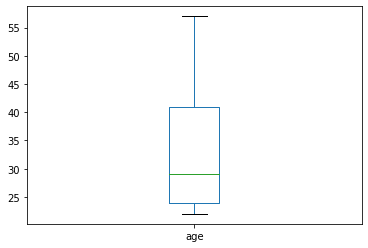

In [ ]:
employee_details_data.age.plot.box()

## employee_data

In [ ]:
employee_data.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
0,246.0,None,NaN,0.866838,6,NaN,medium,0.134415,Left,4.0,124467
1,134.0,None,NaN,0.555718,2,NaN,low,0.511041,Left,3.0,112210
2,156.0,D00-SS,1.0,0.474082,2,NaN,medium,0.405101,Left,3.0,126150
3,256.0,D00-SP,NaN,0.961360,6,NaN,low,0.152974,Left,4.0,125346
4,146.0,D00-SS,NaN,0.507349,2,NaN,medium,0.434845,Left,3.0,113707


In [ ]:
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14150 entries, 0 to 14149
Data columns (total 11 columns):
avg_monthly_hrs      14150 non-null float64
department           13443 non-null object
filed_complaint      2046 non-null float64
last_evaluation      12663 non-null float64
n_projects           14150 non-null int64
recently_promoted    297 non-null float64
salary               14150 non-null object
satisfaction         14000 non-null float64
status               14150 non-null object
tenure               14000 non-null float64
employee_id          14150 non-null int64
dtypes: float64(6), int64(2), object(3)
memory usage: 1.2+ MB
